<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Tasks](#1)
2.	[Import Libraries](#2)
3.	[Explore Data](#3)
4.	[Data Preprocessing](#4)
5.	[Logistic Regression Model](#5)
6.	[Support Vector Machine Model](#6)
7.	[Random Forest Model](#7)
8.	[Extreme Gradient Boost Model](#8)
9.	[Comparing Model](#9)
10.	[Model Deployment](#10)
11.	[Use The Model and Make Prediction](#11)


# WELCOME! 

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and deploy, dump your model and scaler.

Also you can try to predict new observation.

# Tasks <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [237]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding = 'unicode_escape')
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq", encoding = 'unicode_escape')

In [3]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

In [4]:
df = pd.concat([df_male, df_female], axis=0)
df.shape

(6068, 109)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

## Explore Data <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

In [6]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [7]:
df["DODRace"].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [8]:
for class_ in df["DODRace"].unique():
    if df[df["DODRace"] == class_].shape[0] < 500:
        df = df.drop(index = df[df["DODRace"] == class_].index)

In [9]:
df["DODRace"].value_counts()

1    3669
2    1261
3     659
Name: DODRace, dtype: int64

In [10]:
df.shape

(5589, 109)

In [11]:
df.isnull().sum()

subjectid                         1800
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
SubjectId                         3789
Length: 109, dtype: int64

In [12]:
df["weight_kg"] = df["weightkg"] / 10
df["stature_cm"] = df["stature"] / 10

In [13]:
df = df.drop(columns=["subjectid", "SubjectId", "SubjectNumericRace",
                      "Ethnicity", "Age", "Heightin", "Weightlbs", "WritingPreference",
                      "Date", "Installation", "Component", "Branch", "PrimaryMOS", "weightkg", "stature"])

In [14]:
df.shape

(5589, 96)

In [15]:
df.duplicated().sum()

0

In [16]:
for column in df.columns:
    print(f"Column Name : {column}")
    print(df[column].unique())
    print("-------------------------------------------------------------------")
    print()

Column Name : abdominalextensiondepthsitting
[266 233 287 234 250 263 314 321 227 272 268 288 261 308 245 310 225 270
 209 258 219 286 247 240 193 294 230 301 339 204 285 212 322 273 229 275
 279 304 246 289 451 271 281 251 223 254 320 313 202 228 231 218 232 296
 260 267 237 243 274 198 249 255 295 226 300 262 291 290 303 319 259 404
 236 252 244 283 253 264 241 338 242 220 265 315 276 256 269 280 257 307
 224 282 292 215 235 217 239 238 347 298 221 186 306 332 196 208 199 293
 311 299 328 340 210 216 325 214 324 333 248 187 316 211 372 344 203 213
 205 326 302 305 284 189 201 278 277 184 195 329 191 351 200 335 349 403
 323 207 318 392 197 297 317 358 369 336 345 222 312 165 309 330 182 383
 206 352 362 331 194 376 348 379 353 378 382 190 337 355 364 354 192 327
 365 375 341 343 185 356 346 183 334 177 170 178 342 163 188 176 173 374
 373 180 181 360 357 388 390 179 155 158 174 164 171 159 168 175 172 167
 156 169]
-------------------------------------------------------------------



In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5589.0,247.097871,37.417515,155.0,220.0,243.0,272.0,451.0
acromialheight,5589.0,1408.550546,78.134471,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5589.0,328.105743,20.435656,249.0,314.0,328.0,342.0,393.0
anklecircumference,5589.0,225.198962,15.908307,156.0,214.0,225.0,235.0,293.0
axillaheight,5589.0,1301.817678,71.128519,1062.0,1252.0,1304.0,1351.0,1553.0
...,...,...,...,...,...,...,...,...
wristcircumference,5589.0,169.330649,13.015869,124.0,159.0,171.0,179.0,216.0
wristheight,5589.0,831.196278,47.148355,688.0,798.0,831.0,864.0,1009.0
DODRace,5589.0,1.461442,0.696003,1.0,1.0,1.0,2.0,3.0
weight_kg,5589.0,80.099696,15.590571,35.8,68.7,78.9,89.9,144.2


In [18]:
len(df.select_dtypes("number").drop(columns="DODRace").columns)

93

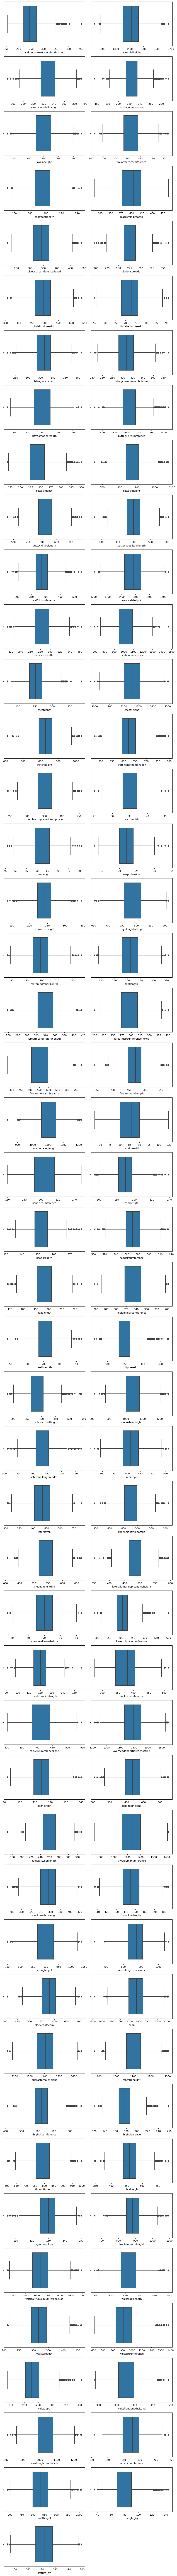

In [19]:
plt.figure(figsize=(10, 150))
for i in range(len(df.select_dtypes("number").drop(columns="DODRace").columns)):
    plt.subplot(49, 2, i+1)
    sns.boxplot(data=df, x=df.select_dtypes("number").drop(columns="DODRace").columns[i])
plt.tight_layout()

In [20]:
drop_index = list(df[df["abdominalextensiondepthsitting"] > 440].index) +\
             list(df[df["anklecircumference"] < 160].index) +\
             list(df[df["buttockheight"] < 680].index) +\
             list(df[df["buttockkneelength"] < 500].index) +\
             list(df[df["buttockpopliteallength"] < 400].index) +\
             list(df[df["chestcircumference"] > 1350].index) +\
             list(df[df["chestdepth"] > 350].index) +\
             list(df[df["crotchheight"] < 650].index) +\
             list(df[df["crotchlengthposterioromphalion"] < 250].index) +\
             list(df[df["forearmforearmbreadth"] > 740].index) +\
             list(df[df["forearmhandlength"] < 350].index) +\
             list(df[df["functionalleglength"] < 850 ].index) +\
             list(df[df["heelbreadth"] < 50].index) +\
             list(df[df["interscyeii"] > 570].index) +\
             list(df[(df["kneeheightmidpatella"] < 350) | (df["kneeheightmidpatella"] > 600)].index)+\
             list(df[df["lowerthighcircumference"] > 550].index)+\
             list(df[df["mentonsellionlength"] > 150].index)+\
             list(df[df["radialestylionlength"] < 180].index)+\
             list(df[df["sleevelengthspinewrist"] < 660].index)+\
             list(df[df["sleeveoutseam"] < 450].index)+\
             list(df[df["span"] < 1400].index)+\
             list(df[df["tenthribheight"] < 900].index)+\
             list(df[df["trochanterionheight"] < 700].index)+\
             list(df[df["waistdepth"] > 380].index)+\
             list(df[df["wristcircumference"] < 130].index)
drop_index = list(set(drop_index))
print(drop_index)

[4, 3609, 26, 1946, 1820, 1692, 2974, 1059, 1444, 295, 819, 2102, 55, 1615, 2388, 2414, 242, 118, 1911]


In [21]:
df = df.drop(index=drop_index)

In [22]:
df.reset_index(inplace=True, drop=True)

In [23]:
df.shape

(5556, 96)

In [24]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,weight_kg,stature_cm
0,266,1467,337,222,1347,253,202,401,369,274,...,240,440,1054,175,853,Male,North Dakota,1,81.5,177.6
1,233,1395,326,220,1293,245,193,394,338,257,...,225,371,1054,167,815,Male,New York,1,72.6,170.2
2,287,1430,341,230,1327,256,196,427,408,261,...,255,411,1041,180,831,Male,New York,2,92.9,173.5
3,234,1347,310,230,1239,262,199,401,359,262,...,205,399,968,176,793,Male,Wisconsin,1,79.4,165.5
4,263,1407,344,216,1293,228,184,404,340,262,...,244,417,1020,171,802,Male,Kentucky,1,80.2,172.0


In [25]:
for i in df.select_dtypes("number"):
    print(f"corr between DODRace and {i:<33}:  {df['DODRace'].corr(df[i])}")

corr between DODRace and abdominalextensiondepthsitting   :  -0.03455188784097961
corr between DODRace and acromialheight                   :  -0.21830436621099453
corr between DODRace and acromionradialelength            :  -0.15862583493918192
corr between DODRace and anklecircumference               :  -0.15876668194152457
corr between DODRace and axillaheight                     :  -0.20549221636937767
corr between DODRace and balloffootcircumference          :  -0.1112188744349974
corr between DODRace and balloffootlength                 :  -0.058666219211227076
corr between DODRace and biacromialbreadth                :  -0.11498223233450952
corr between DODRace and bicepscircumferenceflexed        :  -0.03262439921408601
corr between DODRace and bicristalbreadth                 :  -0.20866782350014496
corr between DODRace and bideltoidbreadth                 :  -0.07280265785551901
corr between DODRace and bimalleolarbreadth               :  -0.10751175612781409
corr between DOD

In [26]:
for i in df.select_dtypes("number"):
    if abs(df['DODRace'].corr(df[i])) < 0.01:
         df.drop(columns = i, inplace=True)

In [27]:
df["DODRace"] = df["DODRace"].map({1 : "White", 2 : "Black", 3 : "Hispanic"})

In [28]:
df.shape

(5556, 91)

# DATA Preprocessing <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale.

In [29]:
X = df.drop(columns="DODRace")
y = df["DODRace"]

In [30]:
categories = X.select_dtypes("object").columns
categories

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [31]:
df["DODRace"].value_counts()

White       3653
Black       1252
Hispanic     651
Name: DODRace, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), categories),
                                      remainder=MinMaxScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

### Vanilla Logistic Model

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(random_state=42, class_weight="balanced"))]
pipe_log_model = Pipeline(steps=operations)

In [36]:
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [37]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[229  13   9]
 [  5 107  18]
 [ 10  88 633]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.93       251
    Hispanic       0.51      0.82      0.63       130
       White       0.96      0.87      0.91       731

    accuracy                           0.87      1112
   macro avg       0.80      0.87      0.82      1112
weighted avg       0.90      0.87      0.88      1112


Train_Set
[[ 934   30   37]
 [  21  435   65]
 [  71  351 2500]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1001
    Hispanic       0.53      0.83      0.65       521
       White       0.96      0.86      0.91      2922

    accuracy                           0.87      4444
   macro avg       0.80      0.87      0.83      4444
weighted avg       0.90      0.87      0.88      4444



In [38]:
operations = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(random_state=42, class_weight="balanced"))]
pipe_log_model = Pipeline(steps=operations)

scores = cross_validate(pipe_log_model, X_train, y_train, 
                        scoring=["f1_macro", "precision_macro", "recall_macro", "accuracy"], 
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_macro           0.803236
test_precision_macro    0.781707
test_recall_macro       0.849180
test_accuracy           0.853967
dtype: float64

### Logistic Model GridsearchCV

In [39]:
operations = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(random_state=42, class_weight="balanced"))]
pipe_log_model = Pipeline(steps=operations)

In [40]:
param_grid = {
    "log_model__C" : np.logspace(-1, 5, 20),
    "log_model__penalty" : ["l1", "l2", "elasticnet"],
    "log_model__solver" : ["liblinear", "lbfgs", "sag", "saga", "newton-cg"]
}

In [41]:
log_grid_model = GridSearchCV(estimator=pipe_log_model, param_grid=param_grid, cv = 10, n_jobs=-1)

In [42]:
%%time
log_grid_model.fit(X_train, y_train)

CPU times: total: 11.2 s
Wall time: 14min 4s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'lo...
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02,

In [71]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[231   5  15]
 [  6  90  34]
 [  7  43 681]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       251
    Hispanic       0.65      0.69      0.67       130
       White       0.93      0.93      0.93       731

    accuracy                           0.90      1112
   macro avg       0.84      0.85      0.85      1112
weighted avg       0.90      0.90      0.90      1112


Train_Set
[[ 950   16   35]
 [  26  384  111]
 [  45  129 2748]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1001
    Hispanic       0.73      0.74      0.73       521
       White       0.95      0.94      0.94      2922

    accuracy                           0.92      4444
   macro avg       0.87      0.88      0.87      4444
weighted avg       0.92      0.92      0.92      4444



In [44]:
log_grid_model.best_params_

{'log_model__C': 16.23776739188721,
 'log_model__penalty': 'l2',
 'log_model__solver': 'liblinear'}

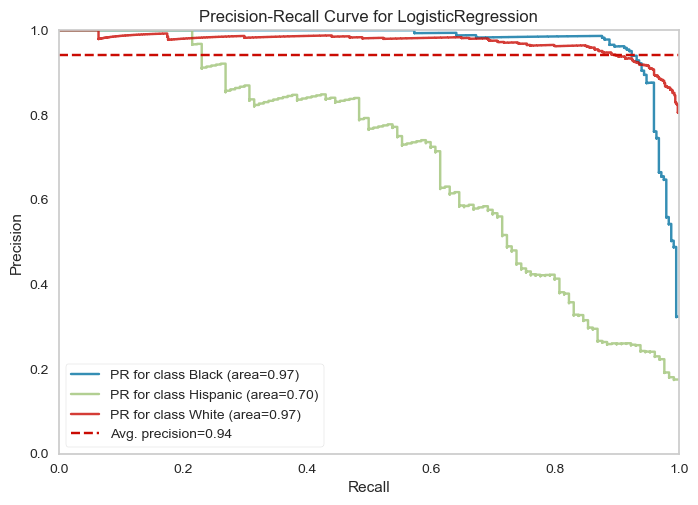

In [45]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(random_state=42, 
                                                                                class_weight="balanced",
                                                                                C = 15,
                                                                                penalty = "l2",
                                                                                solver="liblinear"))]
pipe_log_model = Pipeline(steps=operations)


viz = PrecisionRecallCurve(pipe_log_model, per_class=True, classes= ["Black", "Hispanic", "White"])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [46]:
y_pred = log_grid_model.predict(X_test)

In [47]:
log_AP = viz.score_["micro"]
log_f1 = f1_score(y_test, y_pred, average="macro", labels = ["Black", "Hispanic", "White"])
log_recall = recall_score(y_test, y_pred, average = "macro", labels = ["Black", "Hispanic", "White"])

In [48]:
log_AP, log_f1, log_recall

(0.9419667661358977, 0.84573777246553, 0.8480756548676388)

## 2. SVC <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

### Vanilla SVC model 

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced", random_state=42))]

In [51]:
pipe_svc_model = Pipeline(steps=operations)
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [52]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[223  15  13]
 [  5 106  19]
 [ 11 106 614]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       251
    Hispanic       0.47      0.82      0.59       130
       White       0.95      0.84      0.89       731

    accuracy                           0.85      1112
   macro avg       0.78      0.85      0.80      1112
weighted avg       0.89      0.85      0.86      1112


Train_Set
[[ 926   36   39]
 [  19  436   66]
 [  57  399 2466]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1001
    Hispanic       0.50      0.84      0.63       521
       White       0.96      0.84      0.90      2922

    accuracy                           0.86      4444
   macro avg       0.79      0.87      0.82      4444
weighted avg       0.90      0.86      0.87      4444



In [53]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced", random_state=42))]
pipe_svc_model = Pipeline(steps=operations)

scores = cross_validate(pipe_svc_model, X_train, y_train, 
                        scoring=["f1_macro", "precision_macro", "recall_macro", "accuracy"], 
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_macro           0.789849
test_precision_macro    0.772849
test_recall_macro       0.835546
test_accuracy           0.842255
dtype: float64

###  SVC Model GridsearchCV

In [54]:
param_grid = {
    "svc__C" : [0.01, 0.1, 0.7, 1],
    "svc__gamma" : ["scale", "auto", 0.01, 0.001],
    "svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}

In [55]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced", random_state=42))]
pipe_svc_model = Pipeline(steps=operations)

svc_grid_model = GridSearchCV(estimator=pipe_svc_model, param_grid=param_grid, scoring="f1_macro", n_jobs=-1, verbose=3)

In [56]:
%%time
svc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.7, 1],
                         'svc__gamma': ['scale', 'auto', 0.01, 0.001],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
         

In [57]:
svc_grid_model.best_params_

{'svc__C': 0.7, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [58]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[231  11   9]
 [  5 106  19]
 [ 13  94 624]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       251
    Hispanic       0.50      0.82      0.62       130
       White       0.96      0.85      0.90       731

    accuracy                           0.86      1112
   macro avg       0.80      0.86      0.82      1112
weighted avg       0.90      0.86      0.87      1112


Train_Set
[[ 931   34   36]
 [  19  438   64]
 [  71  371 2480]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1001
    Hispanic       0.52      0.84      0.64       521
       White       0.96      0.85      0.90      2922

    accuracy                           0.87      4444
   macro avg       0.80      0.87      0.82      4444
weighted avg       0.90      0.87      0.88      4444



In [59]:
svc_grid_model.best_params_

{'svc__C': 0.7, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

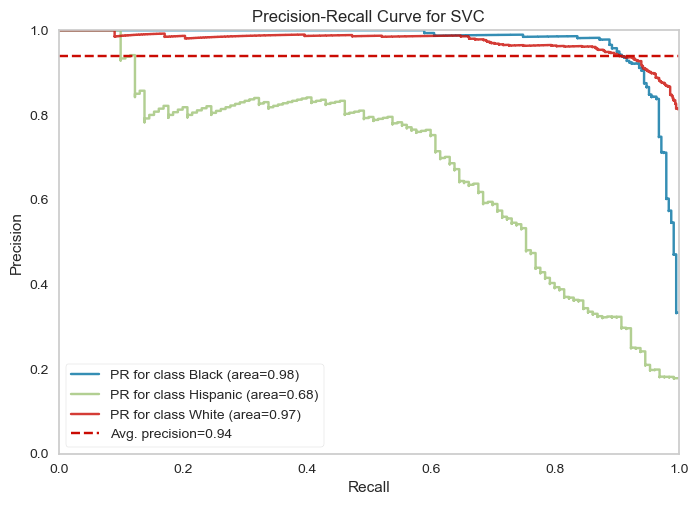

In [60]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight = "balanced", 
                                                           random_state = 42,
                                                           C = 0.7,
                                                           gamma = "scale",
                                                           kernel = "linear"))]
pipe_svc_model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(pipe_svc_model, per_class=True, classes= ["Black", "Hispanic", "White"])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [61]:
y_pred = log_grid_model.predict(X_test)

In [62]:
svc_AP = viz.score_["micro"]
svc_f1 = f1_score(y_test, y_pred, average="macro", labels = ["Black", "Hispanic", "White"])
svc_recall = recall_score(y_test, y_pred, average = "macro", labels = ["Black", "Hispanic", "White"])

In [189]:
svc_AP, svc_f1, svc_recall

(0.9389653421094852, 0.84573777246553, 0.8480756548676388)

## 3. RF <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

### Vanilla RF Model

In [64]:
categories

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [66]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, categories), remainder="passthrough")

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [68]:
operations = [("OrdinalEncoder", column_trans), ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))]
pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [69]:
eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[168   0  83]
 [  8   5 117]
 [  9   2 720]]
              precision    recall  f1-score   support

       Black       0.91      0.67      0.77       251
    Hispanic       0.71      0.04      0.07       130
       White       0.78      0.98      0.87       731

    accuracy                           0.80      1112
   macro avg       0.80      0.56      0.57      1112
weighted avg       0.80      0.80      0.76      1112


Train_Set
[[1001    0    0]
 [   0  521    0]
 [   0    0 2922]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1001
    Hispanic       1.00      1.00      1.00       521
       White       1.00      1.00      1.00      2922

    accuracy                           1.00      4444
   macro avg       1.00      1.00      1.00      4444
weighted avg       1.00      1.00      1.00      4444



In [70]:
operations = [("OrdinalEncoder", column_trans), ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))]
pipe_rf_model = Pipeline(steps=operations)

scores = cross_validate(pipe_rf_model, X_train, y_train, 
                        scoring=["f1_macro", "precision_macro", "recall_macro", "accuracy"], 
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_macro           0.573910
test_precision_macro    0.782127
test_recall_macro       0.566169
test_accuracy           0.803334
dtype: float64

### RF Model GridsearchCV

In [98]:
param_grid = {
    "rf__criterion" : ["gini", "entropy"],
    'rf__n_estimators':[32, 64, 100, 128],
    'rf__max_features':["auto", 2, 4],
    'rf__max_depth':[6, 8, 10, 12 ,14],
    'rf__min_samples_split':[1, 2, 3, 4 , 5], 
    'rf__min_samples_leaf': [1, 2 ,3],
    'rf__max_samples':[0.5, 0.7, 0.9, 1]
}

In [94]:
operations = [("OrdinalEncoder", column_trans), ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))]
pipe_rf_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=pipe_rf_model, param_grid=param_grid, scoring="f1_macro", n_jobs=-1, verbose=3)

In [95]:
%%time
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
CPU times: total: 22.3 s
Wall time: 8min 48s


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini'],
                         'rf__max_depth': [6, 8, 10, 12, 14],
                         'rf__max_features':

In [96]:
rf_grid_model.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 10,
 'rf__max_features': 'auto',
 'rf__max_samples': 0.9,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 128}

In [97]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[188   9  54]
 [ 16  36  78]
 [ 15  40 676]]
              precision    recall  f1-score   support

       Black       0.86      0.75      0.80       251
    Hispanic       0.42      0.28      0.33       130
       White       0.84      0.92      0.88       731

    accuracy                           0.81      1112
   macro avg       0.71      0.65      0.67      1112
weighted avg       0.79      0.81      0.80      1112


Train_Set
[[ 969    4   28]
 [   4  487   30]
 [  17   30 2875]]
              precision    recall  f1-score   support

       Black       0.98      0.97      0.97      1001
    Hispanic       0.93      0.93      0.93       521
       White       0.98      0.98      0.98      2922

    accuracy                           0.97      4444
   macro avg       0.96      0.96      0.96      4444
weighted avg       0.97      0.97      0.97      4444



In [99]:
rf_grid_model.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 10,
 'rf__max_features': 'auto',
 'rf__max_samples': 0.9,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 128}

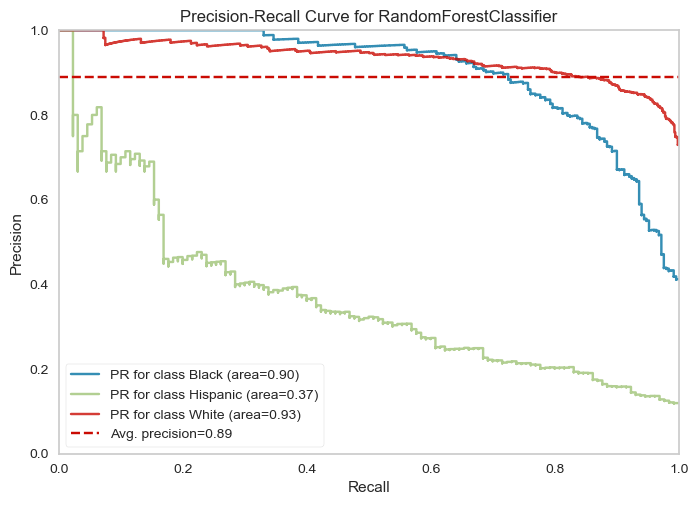

In [100]:
operations = [("OrdinalEncoder", column_trans), ("rf", RandomForestClassifier(class_weight="balanced",
                                                                              random_state=42,
                                                                              criterion="gini",
                                                                              max_depth=10,
                                                                              max_features="auto",
                                                                              max_samples=0.9,
                                                                              min_samples_leaf=3,
                                                                              min_samples_split=2,
                                                                              n_estimators=128))]
pipe_rf_model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(pipe_rf_model, per_class=True, classes= ["Black", "Hispanic", "White"])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [101]:
rf_AP = viz.score_["micro"]
rf_f1 = f1_score(y_test, y_pred, average="macro", labels = ["Black", "Hispanic", "White"])
rf_recall = recall_score(y_test, y_pred, average = "macro", labels = ["Black", "Hispanic", "White"])

## 4. XGBoost  <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

### Vanilla XGBoost Model

In [123]:
import xgboost as xgb

In [124]:
operations = [("OrdinalEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]
pipe_xgb_model = Pipeline(steps=operations)

In [125]:
pipe_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('xgb',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

In [126]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train)
classes_weights

array([0.5069587 , 0.5069587 , 0.5069587 , ..., 0.5069587 , 1.47985348,
       0.5069587 ])

In [127]:
comp = pd.DataFrame(classes_weights)
comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.479853    1001
Hispanic  2.843250     521
White     0.506959    2922
Name: 0, dtype: int64

In [128]:
pipe_xgb_model.fit(X_train, y_train, xgb__sample_weight = classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('xgb',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

In [129]:
eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[209  23  19]
 [ 12  81  37]
 [ 26  99 606]]
              precision    recall  f1-score   support

       Black       0.85      0.83      0.84       251
    Hispanic       0.40      0.62      0.49       130
       White       0.92      0.83      0.87       731

    accuracy                           0.81      1112
   macro avg       0.72      0.76      0.73      1112
weighted avg       0.84      0.81      0.82      1112


Train_Set
[[ 937   30   34]
 [  19  448   54]
 [  89  321 2512]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1001
    Hispanic       0.56      0.86      0.68       521
       White       0.97      0.86      0.91      2922

    accuracy                           0.88      4444
   macro avg       0.81      0.89      0.83      4444
weighted avg       0.90      0.88      0.88      4444



In [130]:
operations = [("OrdinalEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]
pipe_xgb_model = Pipeline(steps=operations)

scores = cross_validate(pipe_xgb_model, X_train, y_train, 
                        scoring = ["f1_macro", "precision_macro", "recall_macro", "accuracy"], 
                        cv = 10,
                        fit_params={"xgb__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_macro           0.730908
test_precision_macro    0.714951
test_recall_macro       0.763226
test_accuracy           0.802886
dtype: float64

### XGBoost Model GridsearchCV

In [141]:
param_grid = {
    "xgb__n_estimators" : [128],
    "xgb__max_depth" : [4, 5],
    "xgb__learning_rate" : [0.1, 0.3, 0.5, 0.7, 0.8],
    "xgb__subsample" : [0.5, 0.7, 1],
    "xgb__colsample_bytree" : [1]
}

In [142]:
operations = [("OrdinalEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]
pipe_xgb_model = Pipeline(steps=operations)

xgb_grid_model = GridSearchCV(estimator=pipe_xgb_model,
                             param_grid=param_grid,
                             scoring="f1_macro",
                             n_jobs=-1,
                             verbose=3)

In [143]:
%%time
xgb_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 5.39 s
Wall time: 3min 31s


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                                       ('xgb',
                                        XGBClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [1],
                         'xgb__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.8],
                         'xgb__max_depth': [4, 5], 'xgb__n_estimators': [128],
                         'xgb__subsample': [0.

In [146]:
xgb_grid_model.best_params_

{'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.5,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 128,
 'xgb__subsample': 1}

In [148]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[209   3  39]
 [  8  56  66]
 [  7  21 703]]
              precision    recall  f1-score   support

       Black       0.93      0.83      0.88       251
    Hispanic       0.70      0.43      0.53       130
       White       0.87      0.96      0.91       731

    accuracy                           0.87      1112
   macro avg       0.83      0.74      0.78      1112
weighted avg       0.86      0.87      0.86      1112


Train_Set
[[1001    0    0]
 [   0  521    0]
 [   0    0 2922]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1001
    Hispanic       1.00      1.00      1.00       521
       White       1.00      1.00      1.00      2922

    accuracy                           1.00      4444
   macro avg       1.00      1.00      1.00      4444
weighted avg       1.00      1.00      1.00      4444



In [151]:
xgb_grid_model.best_params_

{'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.5,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 128,
 'xgb__subsample': 1}

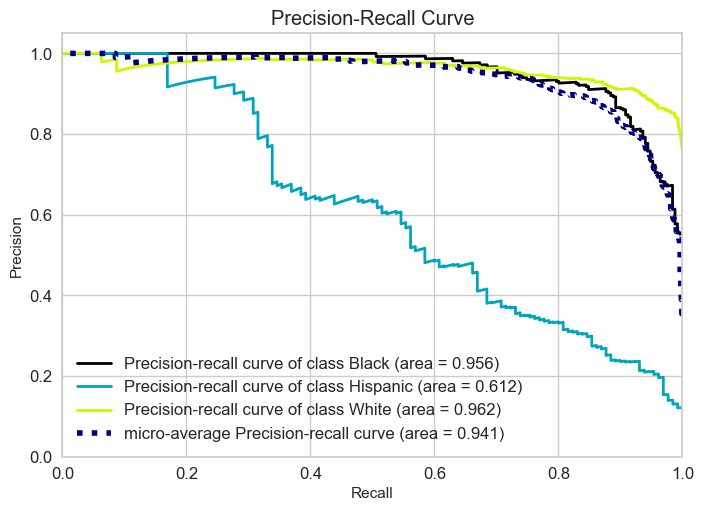

In [153]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

operations = [("OrdinalEncoder", column_trans), ("xgb", XGBClassifier(random_state=42,
                                                                      colsample_bytree=1,
                                                                      learning_rate = 0.5,
                                                                      max_depth = 4,
                                                                      n_estimator = 128,
                                                                      subsample=1))]
pipe_xgb_model = Pipeline(steps=operations)

pipe_xgb_model.fit(X_train, y_train, xgb__sample_weight = classes_weights)
y_pred_proba = pipe_xgb_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba);

In [163]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

In [162]:
average_precision_score(y_test_dummies, y_pred_proba)

0.8433156762134729

In [164]:
y_pred = xgb_grid_model.predict(X_test)

In [165]:
xgb_AP = average_precision_score(y_test_dummies, y_pred_proba)
xgb_f1 = f1_score(y_test, y_pred, average="macro", labels = ["Black", "Hispanic", "White"])
xgb_recall = recall_score(y_test, y_pred, average="macro", labels = ["Black", "Hispanic", "White"])

In [166]:
xgb_AP, xgb_f1, xgb_recall

(0.8433156762134729, 0.7756378600823046, 0.7417116199693142)

## Comparing Models <a class="anchor" id="9"></a>
[Table of Contents](#0.1)

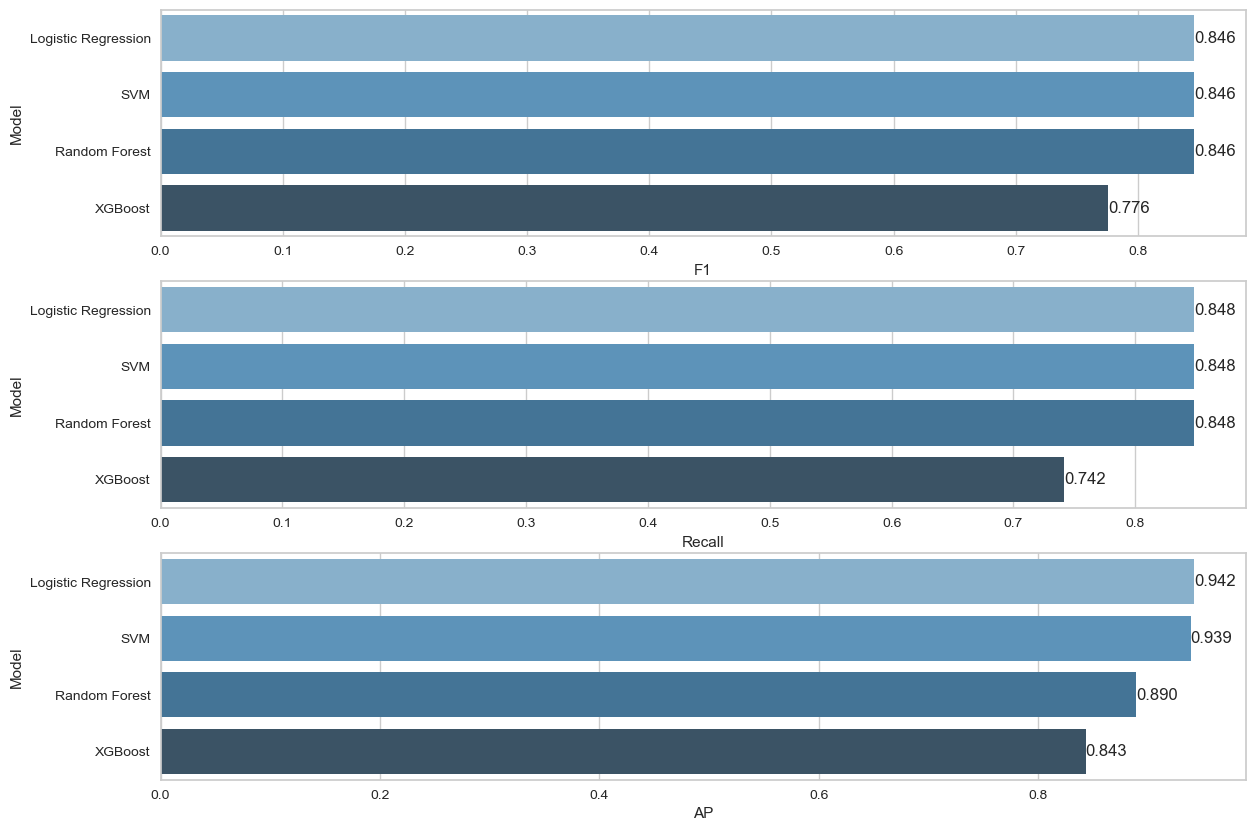

In [191]:
compare = pd.DataFrame({"Model" : ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1"    : [log_f1, svc_f1, rf_f1, xgb_f1],
                        "Recall": [log_recall, svc_recall, rf_recall, xgb_recall],
                        "AP"    : [log_AP, svc_AP, rf_AP, xgb_AP]})

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i, fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i, fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
for i in ax.containers:
    ax.bar_label(i, fmt="%.3f")
    
plt.show()

---
---

# Model Deployment <a class="anchor" id="10"></a>
[Table of Contents](#0.1)

- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [197]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), categories),
                                      remainder=MinMaxScaler())
operations_final = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(random_state=42, 
                                                                                      class_weight="balanced"))]
final_model = Pipeline(steps=operations_final).fit(X_train, y_train)

In [198]:
import pickle
pickle.dump(final_model, open("final_model_SoldierRace.pickle", "wb"))

In [261]:
df[df.index == 3253]

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,weight_kg,stature_cm
3253,233,1471,339,238,1367,257,209,435,361,291,531,77,322,301,140,1044,901,632,523,380,1554,301,1097,244,1339,873,604,345,37,60,22,256,822,102,278,352,308,626,494,1093,91,220,204,567,199,352,74,357,381,1093,605,405,425,511,562,506,74,122,370,402,1462,450,275,1207,371,160,945,923,600,1854,1459,1160,636,808,485,134,886,1675,490,333,917,232,378,1075,174,867,Male,Mississippi,White,84.9,180.0


###  Use The Model and Make Prediction <a class="anchor" id="11"></a>
[Table of Contents](#0.1)

In [278]:
my_dict = {
    "abdominalextensiondepthsitting" : 230,
    "acromialheight" : 1470,
    "acromionradialelength" : 340,
    "anklecircumference" : 240,
    "axillaheight" : 1340,
    "balloffootcircumference" : 260,
    "balloffootlength" : 210,
    "biacromialbreadth" : 435,
    "bicepscircumferenceflexed" : 360,
    "bicristalbreadth" : 290,
    "bideltoidbreadth" : 530,
    "bimalleolarbreadth" : 80,
    "bitragionchinarc" : 320,
    "bitragionsubmandibulararc" : 300,
    "bizygomaticbreadth" : 140,
    "buttockcircumference" : 1045,
    "buttockheight" : 900,
    "buttockkneelength" : 630,
    "buttockpopliteallength" : 523,
    "calfcircumference" : 380,
    "cervicaleheight" : 1550,
    "chestbreadth" : 300,
    "chestcircumference" : 1100,
    "chestdepth" : 240,
    "chestheight" : 1340,
    "crotchheight" : 1340,
    "crotchlengthomphalion" : 600,
    "crotchlengthposterioromphalion" : 345,
    "earbreadth" : 40,
    "earlength" : 60,
    "earprotrusion" : 20,
    "elbowrestheight" : 255,
    "eyeheightsitting" : 820,
    "footbreadthhorizontal" : 102,
    "footlength" : 275,
    "forearmcenterofgriplength" : 350,
    "forearmcircumferenceflexed" : 310,
    "forearmforearmbreadth" : 625, 
    "forearmhandlength" : 495,
    "functionalleglength" : 1090,
    "handbreadth" : 90,
    "handcircumference" : 220,
    "handlength" : 205,
    "headcircumference" : 570,
    "headlength" : 200,
    "heelanklecircumference" : 350,
    "heelbreadth" : 75,
    "hipbreadth" : 360,
    "hipbreadthsitting" : 380,
    "iliocristaleheight" : 1100,
    "interpupillarybreadth" : 600,
    "interscyei" : 405, 
    "interscyeii" : 425,
    "kneeheightmidpatella" : 510,
    "kneeheightsitting" : 560,
    "lateralfemoralepicondyleheight" : 505,
    "lateralmalleolusheight" : 75,
    "mentonsellionlength" : 120,
    "neckcircumference" : 370,
    "neckcircumferencebase" : 400,
    "overheadfingertipreachsitting" : 1460,
    "poplitealheight" : 450,
    "radialestylionlength" : 275,
    "shouldercircumference" : 1200, 
    "shoulderelbowlength" : 370,
    "shoulderlength" : 160,
    "sittingheight" : 940,
    "sleevelengthspinewrist" : 920,
    "sleeveoutseam" : 600,
    "span" : 1850,
    "suprasternaleheight" : 1460,
    "tenthribheight" : 1160,
    "thighcircumference" : 635,
    "thumbtipreach" : 810,
    "tibialheight" : 490,
    "tragiontopofhead" : 130,
    "trochanterionheight" : 890,
    "verticaltrunkcircumferenceusa" : 1675,
    "waistbacklength" : 490,
    "waistbreadth" : 330,
    "waistcircumference" : 915,
    "waistdepth" : 230,
    "waistfrontlengthsitting" : 380,
    "waistheightomphalion" : 1075,
    "wristcircumference" : 170,
    "wristheight" : 860,
    "Gender" : "Male",
    "SubjectsBirthLocation" : "Turkey",
    "weight_kg" : 85,
    "stature_cm" : 180,
}

In [279]:
len(my_dict)

90

In [280]:
new_data = pd.DataFrame(my_dict, index=[1])
new_data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Gender,SubjectsBirthLocation,weight_kg,stature_cm
1,230,1470,340,240,1340,260,210,435,360,290,530,80,320,300,140,1045,900,630,523,380,1550,300,1100,240,1340,1340,600,345,40,60,20,255,820,102,275,350,310,625,495,1090,90,220,205,570,200,350,75,360,380,1100,600,405,425,510,560,505,75,120,370,400,1460,450,275,1200,370,160,940,920,600,1850,1460,1160,635,810,490,130,890,1675,490,330,915,230,380,1075,170,860,Male,Turkey,85,180


In [281]:
new_data.shape

(1, 90)

In [282]:
final_model = pickle.load(open("final_model_SoldierRace.pickle", "rb"))

In [283]:
final_model.predict(new_data)

array(['White'], dtype=object)